## Dependencias

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns

## Lectura de Datos

In [6]:
ruta = '/media/jose/090f6b94-de30-4aaf-9f8a-4e18b120d7f6/bd/chicago/Taxi_Trips.csv'

In [16]:
x = pd.Series(np.array([1,2,3,4,5]))

In [23]:
df = pd.DataFrame({'x':[1,2,5],'y':['A','B','C']})

In [27]:
type(df.x)

pandas.core.series.Series

In [31]:
columnas = ['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
            'Trip Seconds', 'Trip Miles',  'Fare', 'Tips', 'Tolls', 'Extras',
            'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
            'Pickup Centroid Longitude',
            'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']


In [68]:
df = pd.read_csv(ruta,usecols=columnas,dtype=str)

In [69]:
df.shape

(438804, 17)

## Homologación de Tipos de Datos

In [70]:
df.columns = ['trip_id', 'taxi_id', 'trip_start_ts', 'trip_end_ts', 'trip_seconds', 'trip_miles',
              'fare', 'tips', 'tolls', 'extras', 'trip_total', 'payment_type', 'company', 'pu_lat', 'pu_lon', 'do_lat', 'do_lon'
              ]


In [73]:
for c in ['trip_start_ts','trip_end_ts']:
    df[c] = pd.to_datetime(df[c],format='%m/%d/%Y %I:%M:%S %p')

In [78]:
for c in ['trip_seconds', 'trip_miles','fare', 'tips', 'tolls', 'extras', 'trip_total', 'pu_lat', 'pu_lon', 'do_lat', 'do_lon']:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    # df[c] = df[c].astype(float)


## Estadística descriptiva Básica

### Continuo

In [90]:
df.describe(percentiles=[0.01,0.05,0.25,0.75,0.95,0.99])

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pu_lat,pu_lon,do_lat,do_lon
count,438700.000000,438804.000000,438373.000000,438373.000000,438373.000000,438373.000000,438373.000000,411954.000000,411954.000000,398194.000000,398194.000000
mean,1094.896257,6.078747,20.645378,2.434464,0.028355,1.884977,25.119596,41.899457,-87.691756,41.892669,-87.657711
std,1781.059199,7.976993,17.211555,3.853483,8.399593,18.166769,31.582173,0.064535,0.105795,0.059194,0.063592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.651922,-87.913625,41.660136,-87.913625
1%,0.000000,0.000000,3.250000,0.000000,0.000000,0.000000,3.250000,41.706126,-87.913625,41.706588,-87.913625
5%,60.000000,0.000000,4.250000,0.000000,0.000000,0.000000,4.750000,41.777196,-87.913625,41.763247,-87.804532
25%,424.000000,0.890000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,828.000000,2.600000,13.750000,0.000000,0.000000,0.000000,16.500000,41.898332,-87.642649,41.893216,-87.633308
75%,1500.000000,10.850000,31.000000,3.040000,0.000000,1.000000,34.450000,41.953582,-87.626211,41.922686,-87.625192
95%,2582.000000,18.000000,46.250000,10.000000,0.000000,6.000000,60.900000,41.980264,-87.616134,41.983636,-87.615970


array([[<Axes: title={'center': 'trip_start_ts'}>,
        <Axes: title={'center': 'trip_end_ts'}>,
        <Axes: title={'center': 'trip_seconds'}>,
        <Axes: title={'center': 'trip_miles'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'tips'}>,
        <Axes: title={'center': 'tolls'}>,
        <Axes: title={'center': 'extras'}>],
       [<Axes: title={'center': 'trip_total'}>,
        <Axes: title={'center': 'pu_lat'}>,
        <Axes: title={'center': 'pu_lon'}>,
        <Axes: title={'center': 'do_lat'}>],
       [<Axes: title={'center': 'do_lon'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

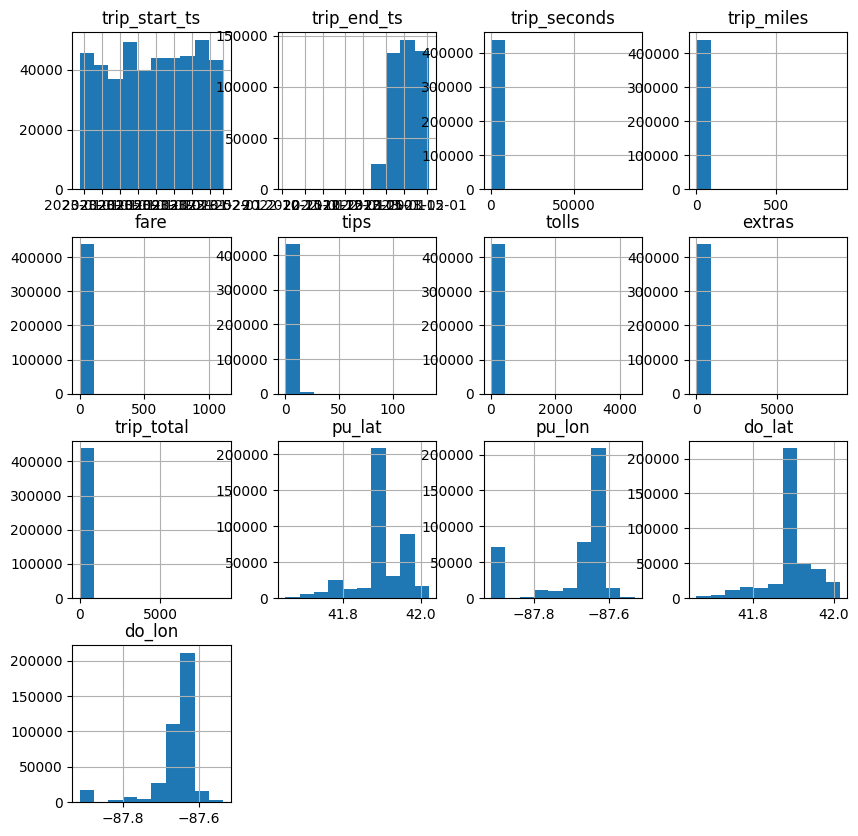

In [95]:
df.hist(figsize=(10,10))

<Axes: xlabel='trip_miles', ylabel='Density'>

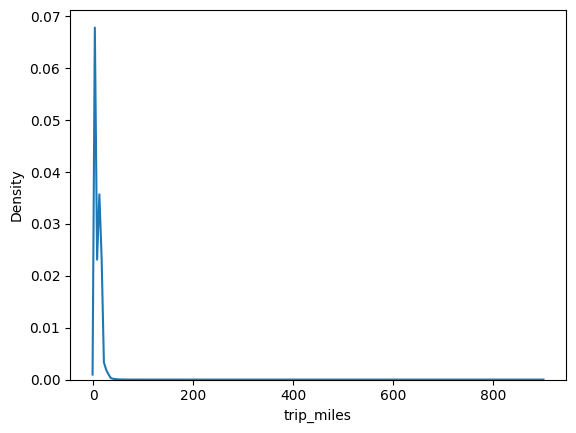

In [99]:
sns.kdeplot(df['trip_miles'])

In [100]:
df.corr()

/tmp/ipykernel_122450/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,pu_lat,pu_lon,do_lat,do_lon
trip_seconds,1.000000,0.300231,0.385523,0.128185,-0.000039,0.031621,0.244062,0.058515,-0.194692,0.012060,-0.102756
trip_miles,0.300231,1.000000,0.720102,0.364410,0.000241,0.096649,0.493914,0.119563,-0.436639,-0.030205,-0.146030
fare,0.385523,0.720102,1.000000,0.430826,0.000652,0.108751,0.661316,0.140052,-0.525129,-0.034526,-0.202025
tips,0.128185,0.364410,0.430826,1.000000,0.000797,0.120385,0.429536,0.274884,-0.498952,0.148877,-0.121215
tolls,-0.000039,0.000241,0.000652,0.000797,1.000000,0.462180,0.532268,-0.002543,-0.000189,-0.004371,0.002386
extras,0.031621,0.096649,0.108751,0.120385,0.462180,1.000000,0.772519,0.060387,-0.133409,0.012734,-0.015861
trip_total,0.244062,0.493914,0.661316,0.429536,0.532268,0.772519,1.000000,0.141521,-0.412523,0.006314,-0.129671
pu_lat,0.058515,0.119563,0.140052,0.274884,-0.002543,0.060387,0.141521,1.000000,-0.587867,0.497897,-0.213720
pu_lon,-0.194692,-0.436639,-0.525129,-0.498952,-0.000189,-0.133409,-0.412523,-0.587867,1.000000,-0.224328,0.218602
do_lat,0.012060,-0.030205,-0.034526,0.148877,-0.004371,0.012734,0.006314,0.497897,-0.224328,1.000000,-0.477506


### Discreto

In [111]:
df['payment_type'] = np.where(df['payment_type'].isin(['Credit Card','Cash','Mobile','Prcard']),df['payment_type'],'Other')
df['payment_type'].value_counts(1)

Credit Card    0.337711
Cash           0.307707
Mobile         0.153700
Prcard         0.137050
Other          0.063833
Name: payment_type, dtype: float64

In [112]:
df['company'] = np.where(df['company'].isin(['Flash Cab','Taxi Affiliation Services','Sun Taxi','City Service']),df['company'],'Other')
df['company'].value_counts(True)

Other                        0.384306
Flash Cab                    0.215666
Taxi Affiliation Services    0.198417
Sun Taxi                     0.104322
City Service                 0.097289
Name: company, dtype: float64

<Axes: ylabel='company'>

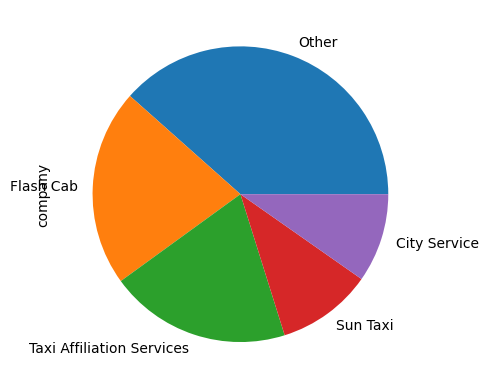

In [113]:
df['company'].value_counts(True).plot(kind='pie')

## Agrupaciones

In [125]:
aux = df.loc[df['payment_type'].isin(['Credit Card','Mobile'])]
aux = aux[['company','tips','trip_total']].groupby('company').sum()
aux['%propina'] = aux['tips']/aux['trip_total']
aux

,tips,trip_total,%propina
company,,,
City Service,121634.19,737315.47,0.164969
Flash Cab,114789.99,712375.61,0.161137
Other,490619.60,3059707.23,0.160349
Sun Taxi,149122.32,894159.67,0.166774
Taxi Affiliation Services,174036.70,1046757.53,0.166263


In [130]:
aux = df.loc[df['payment_type'].isin(['Credit Card','Mobile'])]
aux[['payment_type','tips','trip_total']].groupby('payment_type').agg(['mean','count'])

tips         trip_total        
                  mean   count       mean   count
payment_type                                     
Credit Card   5.689701  148187  35.118975  148187
Mobile        3.070149   67444  18.476661   67444